### **1. Personal Information**

**Name:** Xander Akiko Snelder

**StudentID:** 11598727

**Email:** [xander.snelder2@student.uva.nl](xander.snelder2@student.uva.nl)

**Submitted on:** 22-04-2024

**Github:** https://github.com/XanderSnelder/master-thesis

### **2. Data Context**

#### **2.1. English SimLex-999**

In 2015, the SimLex-999 dataset was introduced and became a gold standard for measuring semantic similarities between English word pairs. This study differentiates between similarity and association of words, emphasizing that these concepts are not mutually exclusive or independent. Semantic similarity refers to how much two words share common characteristics. Semantic association, also known as semantic relatedness, contains a broader range of associations between words. This includes how frequent words interact or co-occur in practical situations. SimLex-999 is developed with the help of 500 native English speakers from the United States and contains 999 word pairs, where each pair has been rated for similarity by approximately 50 annotators. The annotation process was conducted through the crowdsourcing marketplace Amazon Mechanical Turk (MTurk).

https://doi.org/10.48550/arXiv.1408.3456

#### **2.2. Dutch SimLex-999**

Based on SimLex-999, variations have been developed that focus on different aspects or shortcomings of the original version. In 2024, the Dutch SimLex-999 has been developed with the help of 235 native Dutch speakers. The English words were translated into Dutch, while ensuring they matched their original semantics. The German SimLex-999 was referenced because of its linguistic similarities with Dutch. Each word pair was rated by 15 annotators on a scale from 0 to 10, and the averages were used as final scores.

#### **2.3. Description of Columns**

##### **2.3.1. English SimLex-999**

The English SimLex-999 dataset contains the following columns:

* **word1:** First word in the pair.

* **word2:** Second word in the pair.

* **POS:** Part-Of-Speech (POS) of the word pairs. 'N' stands for nouns, 'V' for verbs, and 'A' for adjectives.

* **SimLex999:** Core of the dataset. Similarity scores represent how similar two words are in meaning, judged by human annotators. The scores range from 0 (no similarity) to 10 (high similarity).

* **conc(w1):** Conceptual concreteness scores of the first word, ranging from 1 (highly abstract) to 5 (highly concrete). Concreteness indicates how tangible or concrete a word is, as opposed to abstract. Extracted from USF Free Association Norms.

* **conc(w2):** Same as conc(w1), but for the second word in the pair.

* **concQ:** Concreteness of the word pairs categorized into quartiles (1-4).

* **Assoc(USF):** Association/relatedness scores ranging from 0 (no association) to 10 (high association). Extracted from USF Free Association Norms.

* **SimAssoc333:** Binary indicator used for a subset of the 333 most associated word pairs in SimLex-999, according to USF Association Norms.

* **SD(SimLex):** Standard deviation of the SimLex999 similarity ratings, indicating the variability of the human judgements for each word pair.

https://fh295.github.io//simlex.html

##### **2.3.2. Dutch SimLex-999**

The description of columns for the Dutch SimLex-999 are similar, except that this dataset does not contain the association and concreteness scores extracted from the USF Free Association Norms.

### **3. Data Description and Analysis**

Both datasets are relatively small and straightforward, and there is no need for extensive data cleaning or processing. The only data processing step is enriching the Dutch SimLex-999 dataset with additional columns.

#### **3.1. Set-up**

In [136]:
# Import libraries and utils
%run '../eda/utils.ipynb'

In [137]:
# Load data
eng_simlex = pd.read_csv("../data/eng-simlex-999.txt", delimiter='\t')
nl_simlex_raw = pd.read_csv("../data/nl-simlex-999.txt", delimiter='\t')
nl_simlex_questionnaire = pd.read_csv("../data/nl-simlex-999-questionnaire.csv")

In [23]:
# Drop redundant columns
nl_simlex_questionnaire.drop(columns=['POS'], inplace=True)

# Rename column for join
nl_simlex_questionnaire = nl_simlex_questionnaire.rename(columns={'Simlex999': 'SimLex999'})

# Enrich Dutch SimLex with standard deviation, variance, and count
nl_simlex = pd.merge(nl_simlex_raw, nl_simlex_questionnaire, on=['word1', 'word2', 'SimLex999'], how='left') # also join with SimLex999 because of duplicate word pairs

# Rename column for consistency between datasets
nl_simlex = nl_simlex.rename(columns={'Std Deviation': 'SD(SimLex)'})

#### **3.2. Initial Overview**

##### **3.2.1. Dutch SimLex-999**

In [25]:
# Summary of dataset
nl_simlex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   word1       999 non-null    object 
 1   word2       999 non-null    object 
 2   SimLex999   999 non-null    float64
 3   POS         999 non-null    object 
 4   SD(SimLex)  999 non-null    float64
 5   Variance    999 non-null    float64
 6   Count       999 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 62.4+ KB


In [26]:
# First 5 rows
nl_simlex.head()

,word1,word2,SimLex999,POS,SD(SimLex),Variance,Count
0,oud,nieuw,1.94,A,2.42,5.87,16
1,slim,intelligent,8.19,A,1.54,2.38,15
2,hard,moeilijk,4.46,A,3.18,10.14,10
3,gelukkig,vrolijk,6.49,A,2.15,4.62,17
4,hard,stoer,5.69,A,2.94,8.64,13


In [27]:
# Last 5 rows
nl_simlex.tail()

,word1,word2,SimLex999,POS,SD(SimLex),Variance,Count
994,samenvoegen,verwerven,3.89,V,3.11,9.65,14
995,sturen,bijwonen,1.85,V,1.95,3.79,16
996,verzamelen,bijwonen,1.06,V,1.71,2.93,15
997,opnemen,intrekken,2.29,V,2.67,7.13,11
998,bijwonen,aankomen,1.32,V,1.05,1.10,17


In [28]:
# Count of rows
nl_simlex.count()

word1         999
word2         999
SimLex999     999
POS           999
SD(SimLex)    999
Variance      999
Count         999
dtype: int64

In [29]:
# Data types
nl_simlex.dtypes

word1          object
word2          object
SimLex999     float64
POS            object
SD(SimLex)    float64
Variance      float64
Count           int64
dtype: object

In [30]:
# Missing values per column
nl_simlex.isnull().sum()

word1         0
word2         0
SimLex999     0
POS           0
SD(SimLex)    0
Variance      0
Count         0
dtype: int64

In [31]:
# Counts of values in categorical column 'POS'
nl_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

##### **3.2.2. English SimLex-999**

In [32]:
# Summary of dataset
eng_simlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   word1        999 non-null    object 
 1   word2        999 non-null    object 
 2   POS          999 non-null    object 
 3   SimLex999    999 non-null    float64
 4   conc(w1)     999 non-null    float64
 5   conc(w2)     999 non-null    float64
 6   concQ        999 non-null    int64  
 7   Assoc(USF)   999 non-null    float64
 8   SimAssoc333  999 non-null    int64  
 9   SD(SimLex)   999 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


In [33]:
# First 5 rows
eng_simlex.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [34]:
# Last 5 rows
eng_simlex.tail()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
994,join,acquire,V,2.85,2.86,2.93,2,0.0,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.0,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.0,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.0,0,1.75
998,attend,arrive,V,6.08,3.17,3.22,2,0.0,0,1.18


In [35]:
# Count of rows
eng_simlex.count()

word1          999
word2          999
POS            999
SimLex999      999
conc(w1)       999
conc(w2)       999
concQ          999
Assoc(USF)     999
SimAssoc333    999
SD(SimLex)     999
dtype: int64

In [36]:
# Data types
eng_simlex.dtypes

word1           object
word2           object
POS             object
SimLex999      float64
conc(w1)       float64
conc(w2)       float64
concQ            int64
Assoc(USF)     float64
SimAssoc333      int64
SD(SimLex)     float64
dtype: object

In [37]:
# Missing values per column
eng_simlex.isnull().sum()

word1          0
word2          0
POS            0
SimLex999      0
conc(w1)       0
conc(w2)       0
concQ          0
Assoc(USF)     0
SimAssoc333    0
SD(SimLex)     0
dtype: int64

In [38]:
# Count of values in categorical column 'POS'
eng_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

#### **3.3. Descriptive Statistics**

##### **3.3.1. Dutch SimLex-999**

In [39]:
# Summary statistics of the similarity score
round(nl_simlex['SimLex999'].describe(), 2)

count    999.00
mean       3.65
std        2.00
min        0.49
25%        2.00
50%        3.27
75%        5.08
max        9.28
Name: SimLex999, dtype: float64

In [40]:
# Summary statistics of the standard deviation
round(nl_simlex['SD(SimLex)'].describe(), 2)

count    999.00
mean       2.37
std        0.64
min        0.48
25%        2.00
50%        2.46
75%        2.84
max        4.13
Name: SD(SimLex), dtype: float64

In [41]:
# Mean vs Median of numerical columns
print_mean_median(nl_simlex)

SimLex999 - Mean: 3.65, Median: 3.27
SD(SimLex) - Mean: 2.37, Median: 2.46
Variance - Mean: 6.03, Median: 6.04
Count - Mean: 15.44, Median: 16.0


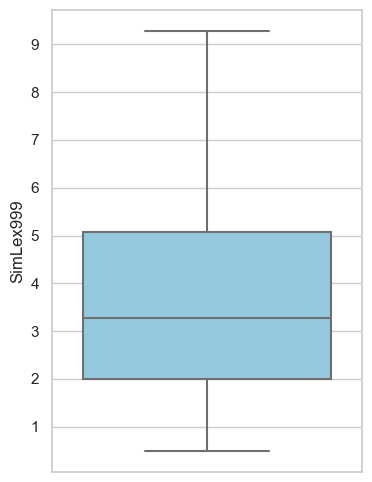

In [42]:
plot_boxplot(nl_simlex, 'SimLex999')

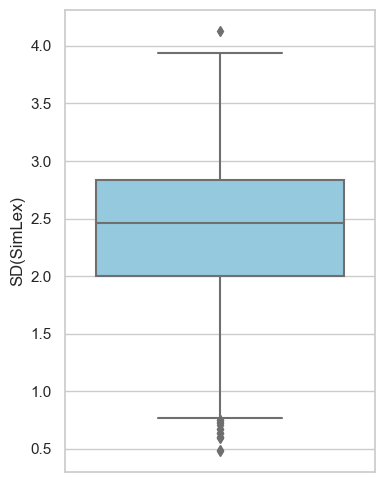

In [43]:
plot_boxplot(nl_simlex, 'SD(SimLex)')

##### **3.3.2 English SimLex-999**

In [44]:
# Summary statistics of the similarity score
round(eng_simlex['SimLex999'].describe(), 2)

count    999.00
mean       4.56
std        2.61
min        0.23
25%        2.38
50%        4.67
75%        6.75
max        9.80
Name: SimLex999, dtype: float64

In [45]:
# Summary statistics of the standard deviation
round(eng_simlex['SD(SimLex)'].describe(), 2)

count    999.00
mean       1.27
std        0.37
min        0.34
25%        1.08
50%        1.31
75%        1.54
max        2.18
Name: SD(SimLex), dtype: float64

In [46]:
# Summary statistics of the conc(w1)
round(eng_simlex['conc(w1)'].describe(), 2)

count    999.00
mean       3.66
std        1.13
min        1.19
25%        2.62
50%        3.83
75%        4.79
max        5.00
Name: conc(w1), dtype: float64

In [47]:
# Summary statistics of the conc(w2)
round(eng_simlex['conc(w2)'].describe(), 2)

count    999.00
mean       3.57
std        1.16
min        1.19
25%        2.50
50%        3.66
75%        4.75
max        5.00
Name: conc(w2), dtype: float64

In [48]:
# Summary statistics of the Assoc(USF)
round(eng_simlex['Assoc(USF)'].describe(), 2)

count    999.00
mean       0.75
std        1.34
min        0.00
25%        0.14
50%        0.25
75%        0.68
max        8.85
Name: Assoc(USF), dtype: float64

In [49]:
# Mean vs Median of numerical columns
print_mean_median(eng_simlex)

SimLex999 - Mean: 4.56, Median: 4.67
conc(w1) - Mean: 3.66, Median: 3.83
conc(w2) - Mean: 3.57, Median: 3.66
concQ - Mean: 2.5, Median: 3.0
Assoc(USF) - Mean: 0.75, Median: 0.25
SimAssoc333 - Mean: 0.33, Median: 0.0
SD(SimLex) - Mean: 1.27, Median: 1.31


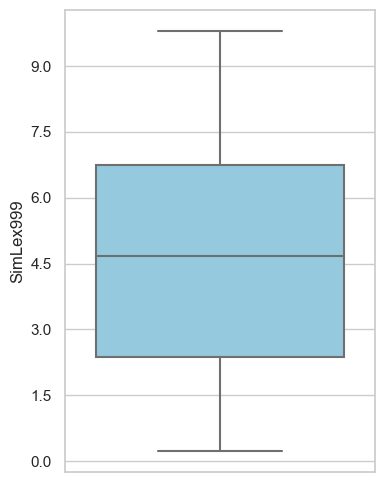

In [50]:
# Plot boxplot of similarity score
plot_boxplot(eng_simlex, 'SimLex999')

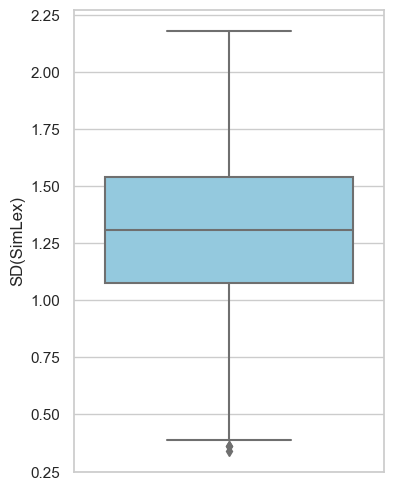

In [51]:
# Plot boxplot of standard deviation
plot_boxplot(eng_simlex, 'SD(SimLex)')

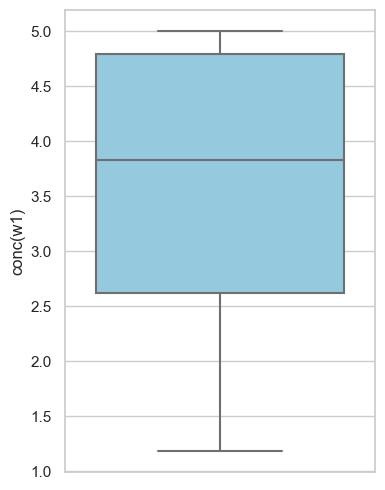

In [52]:
# Plot boxplot of conc(w1)
plot_boxplot(eng_simlex, 'conc(w1)')

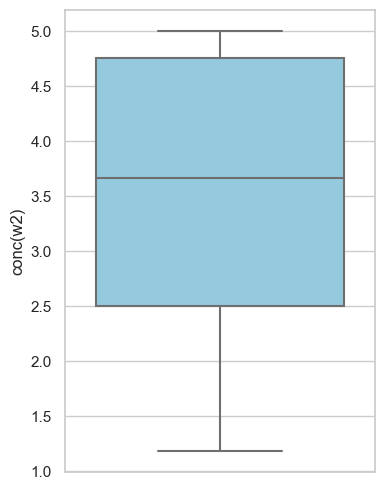

In [53]:
# Plot boxplot of conc(w2)
plot_boxplot(eng_simlex, 'conc(w2)')

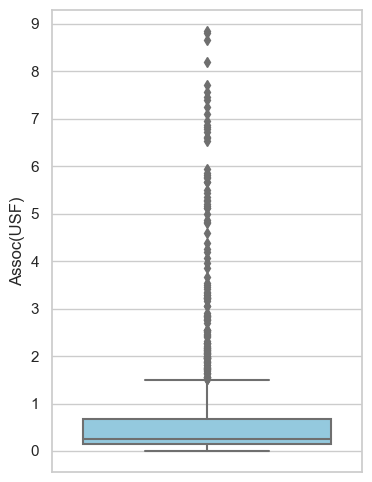

In [54]:
# Plot boxplot of Assoc(USF)
plot_boxplot(eng_simlex, 'Assoc(USF)')

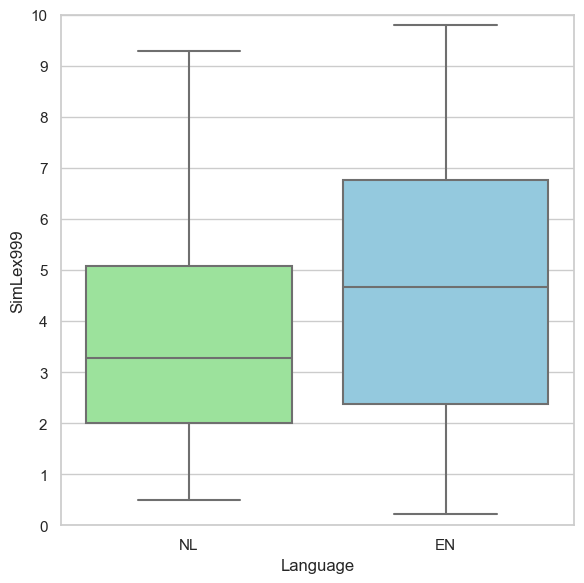

In [107]:
# Add a new column to each DataFrame to indicate the language
nl_simlex['Language'] = 'NL'
eng_simlex['Language'] = 'EN'

# Combine the two DataFrames
combined_data = pd.concat([nl_simlex, eng_simlex])

# Creating the boxplot with specified colors
plt.figure(figsize=(6, 6))
sns.boxplot(x='Language', y='SimLex999', data=combined_data, palette=['lightgreen', 'skyblue',])

# Setting labels and title
plt.ylabel('SimLex999')
# plt.title('Comparison of SimLex-999 Similarity Scores')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

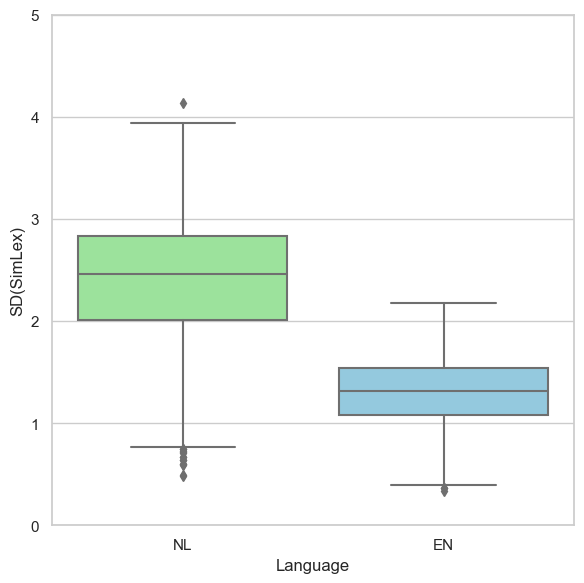

In [109]:
# Creating the boxplot with specified colors
plt.figure(figsize=(6, 6))
sns.boxplot(x='Language', y='SD(SimLex)', data=combined_data, palette=['lightgreen', 'skyblue',])

# Setting labels and title
plt.ylabel('SD(SimLex)')
# plt.title('Comparison of SimLex-999 Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 10

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

#### **3.4. Numerical Data Distribution**

##### **3.4.1. Dutch SimLex-999**

In [57]:
# Variance of numerical columns
print_variance(nl_simlex)

SimLex999 - Variance: 3.99
SD(SimLex) - Variance: 0.41
Variance - Variance: 8.13
Count - Variance: 4.1


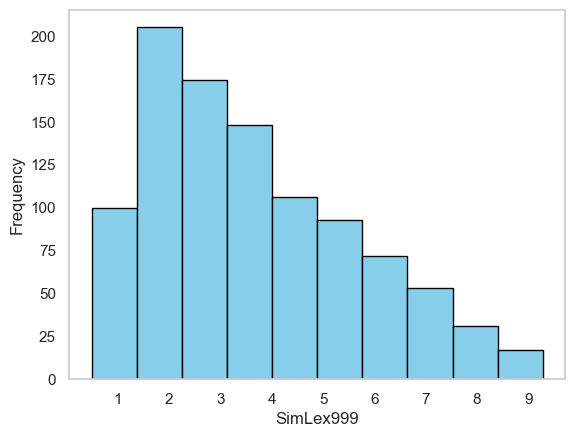

In [58]:
plot_histogram(nl_simlex, 'SimLex999')

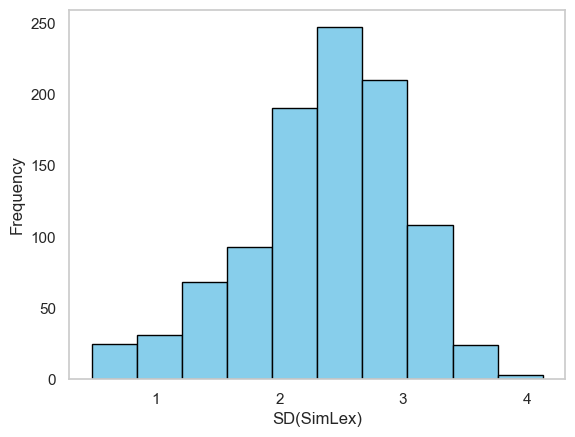

In [59]:
plot_histogram(nl_simlex, 'SD(SimLex)')

##### **3.4.2. English SimLex-999**

In [60]:
# Variance of numerical columns
print_variance(eng_simlex)

SimLex999 - Variance: 6.84
conc(w1) - Variance: 1.28
conc(w2) - Variance: 1.34
concQ - Variance: 1.25
Assoc(USF) - Variance: 1.81
SimAssoc333 - Variance: 0.22
SD(SimLex) - Variance: 0.13


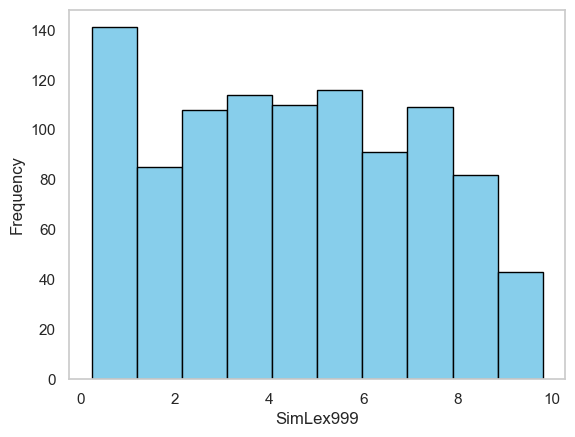

In [61]:
plot_histogram(eng_simlex, 'SimLex999')

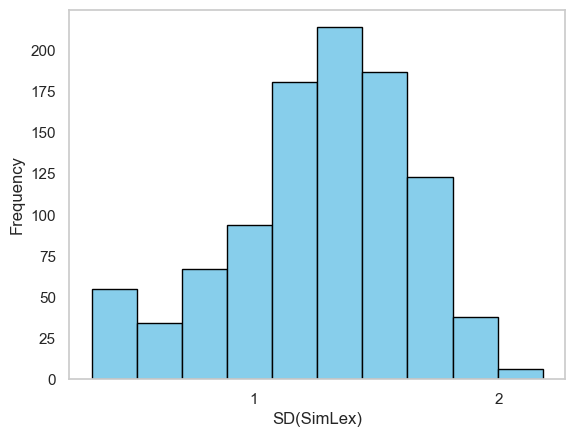

In [62]:
plot_histogram(eng_simlex, 'SD(SimLex)')

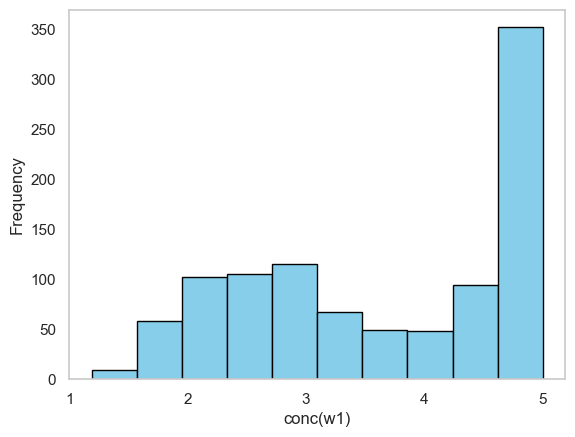

In [63]:
plot_histogram(eng_simlex, 'conc(w1)')

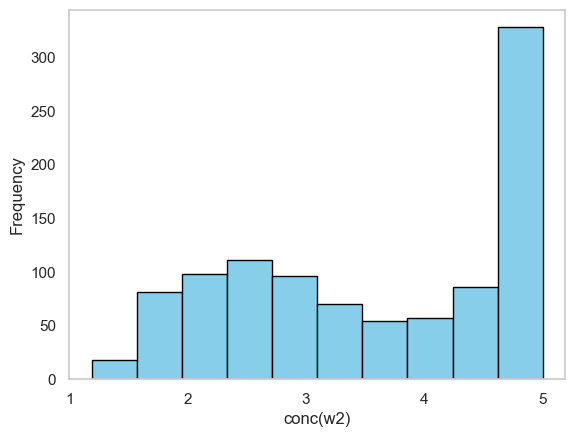

In [64]:
plot_histogram(eng_simlex, 'conc(w2)')

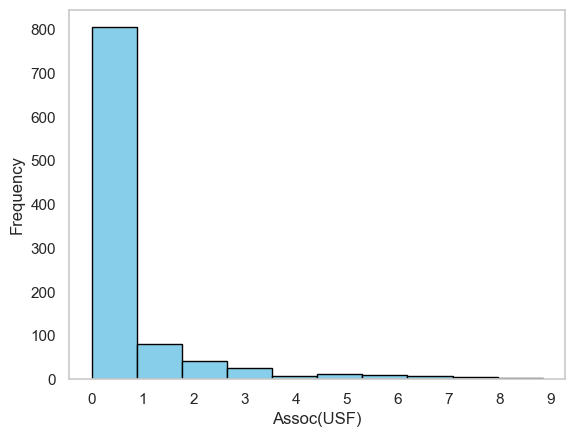

In [65]:
plot_histogram(eng_simlex, 'Assoc(USF)')

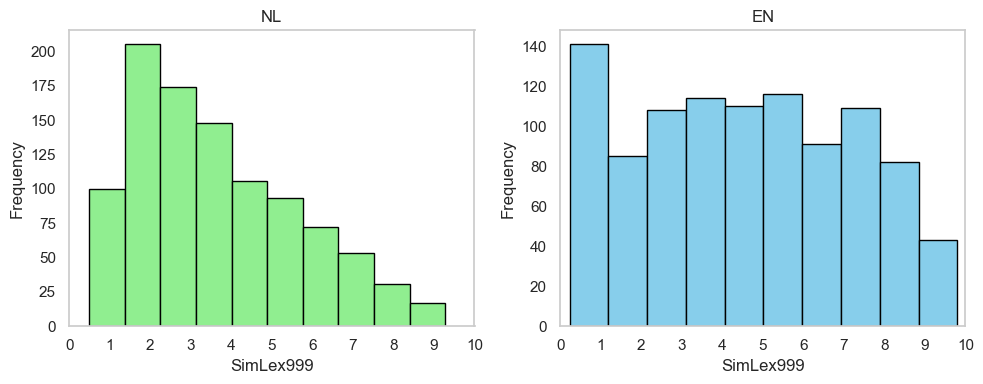

In [108]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Defining the x-axis limits
x_min = 0
x_max = 10

# Plotting the first histogram (Dutch)
axes[0].hist(nl_simlex['SimLex999'], bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False)  # Turning off the grid

# Plotting the second histogram (English)
axes[1].hist(eng_simlex['SimLex999'], bins=10, edgecolor='black', color='skyblue')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False)  # Turning off the grid

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

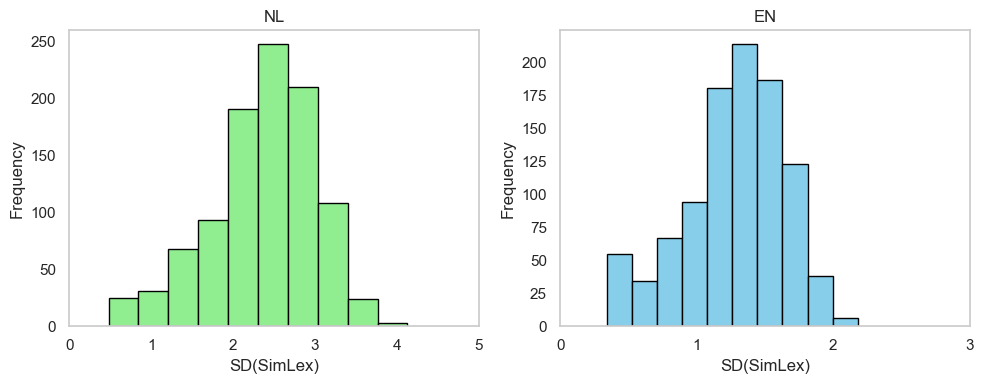

In [110]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Defining the x-axis limits for NL
nl_x_min = 0
nl_x_max = 5

# Defining the x-axis limits for EN
en_x_min = 0
en_x_max = 3

# Plotting the first histogram (Dutch)
axes[0].hist(nl_simlex['SD(SimLex)'], bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('NL')
axes[0].set_xlabel('SD(SimLex)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(nl_x_min, nl_x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False)  # Turning off the grid

# Plotting the second histogram (English)
axes[1].hist(eng_simlex['SD(SimLex)'], bins=10, edgecolor='black', color='skyblue')
axes[1].set_title('EN')
axes[1].set_xlabel('SD(SimLex)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(en_x_min, en_x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False)  # Turning off the grid

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

#### **3.5. Outliers**

##### **3.5.1. Dutch SimLex-999**

In [68]:
print_outlier_counts(nl_simlex)

Outliers in SD(SimLex): 15
Outliers in Variance: 3
No outliers found in columns: SimLex999, Count


##### **3.5.2. English SimLex-999**

In [69]:
print_outlier_counts(eng_simlex)

Outliers in Assoc(USF): 130
Outliers in SD(SimLex): 3
No outliers found in columns: SimLex999, conc(w1), conc(w2), concQ, SimAssoc333


In [70]:
print_outlier_data(eng_simlex, 'Assoc(USF)')


Outliers in Assoc(USF):
       word1        word2 POS  SimLex999  conc(w1)  conc(w2)  concQ  \
0        old          new   A       1.58      2.72      2.81      2   
1      smart  intelligent   A       9.20      1.75      2.46      1   
2       hard    difficult   A       8.77      3.76      2.21      2   
3      happy     cheerful   A       9.55      2.56      2.34      1   
4       hard         easy   A       0.95      3.76      2.07      2   
..       ...          ...  ..        ...       ...       ...    ...   
786  protect       defend   V       9.13      2.86      2.31      1   
787     kill      destroy   V       5.90      3.90      3.08      2   
788   create         make   V       8.72      2.62      2.67      2   
789   accept       reject   V       0.83      3.03      2.40      2   
790   ignore        avoid   V       6.87      2.22      2.41      1   

     Assoc(USF)  SimAssoc333  SD(SimLex) Language  
0          7.25            1        0.41       EN  
1          7.11   

In [71]:
print_outlier_data(eng_simlex, 'SD(SimLex)')


Outliers in SD(SimLex):
         word1      word2 POS  SimLex999  conc(w1)  conc(w2)  concQ  \
12        easy  difficult   A       0.58      2.07      2.21      1   
727       task      woman   N       0.68      2.84      4.46      2   
984  cooperate       join   V       5.18      1.87      2.86      1   

     Assoc(USF)  SimAssoc333  SD(SimLex) Language  
12         2.83            1        0.36       EN  
727        0.00            0        0.34       EN  
984        0.00            0        0.36       EN  


#### **3.6. Categorical Data Distributions**

##### **3.6.1. Dutch SimLex-999**

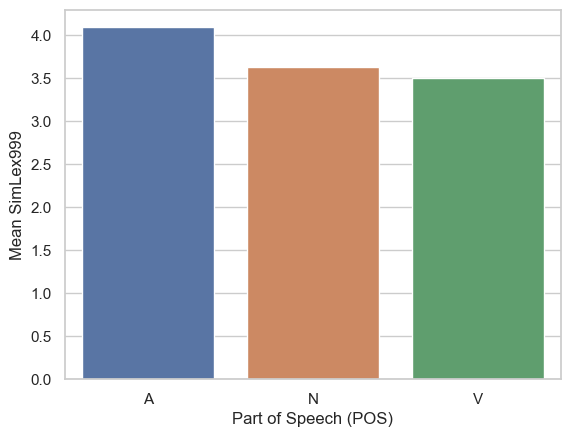

POS
A    4.09
N    3.63
V    3.50
Name: SimLex999, dtype: float64


In [72]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(nl_simlex, 'SimLex999')

# Calculate mean per POS
print_mean_per_pos(nl_simlex, 'SimLex999')

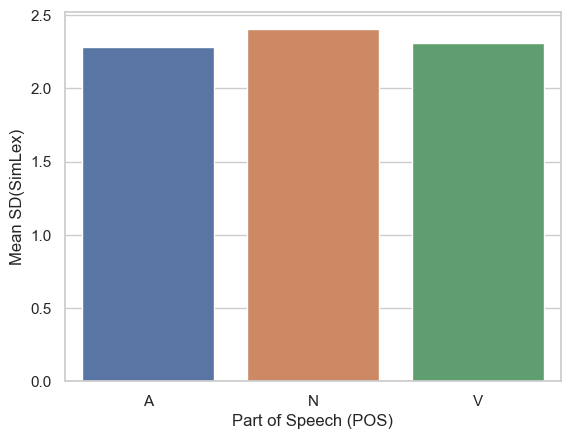

POS
A    2.29
N    2.41
V    2.31
Name: SD(SimLex), dtype: float64


In [73]:
# Plot the mean standard deviation aggregated by POS
plot_feature_by_pos(nl_simlex, 'SD(SimLex)')

# Calculate mean per POS
print_mean_per_pos(nl_simlex, 'SD(SimLex)')

##### **3.6.2. English SimLex-999**

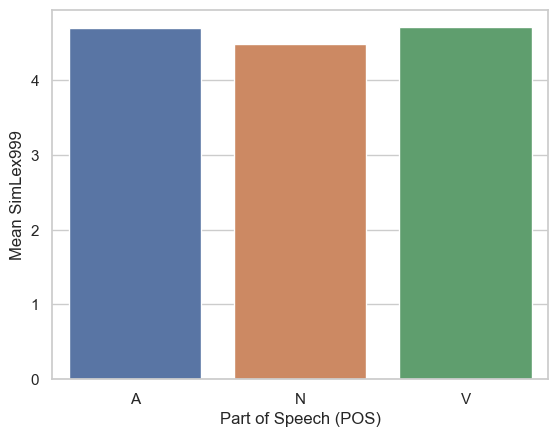

POS
A    4.70
N    4.49
V    4.71
Name: SimLex999, dtype: float64


In [74]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(eng_simlex, 'SimLex999')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'SimLex999')

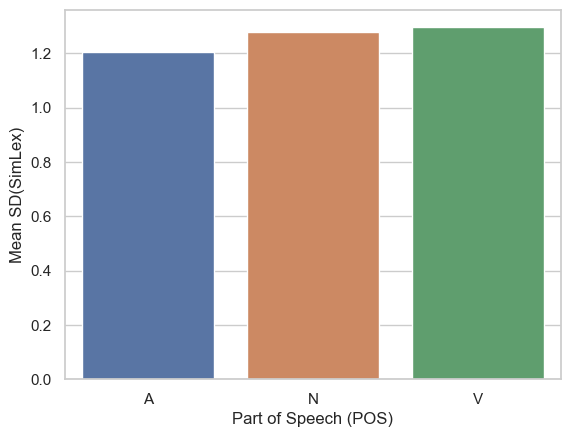

POS
A    1.21
N    1.28
V    1.30
Name: SD(SimLex), dtype: float64


In [75]:
# Plot the mean standard deviation aggregated by POS
plot_feature_by_pos(eng_simlex, 'SD(SimLex)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'SD(SimLex)')

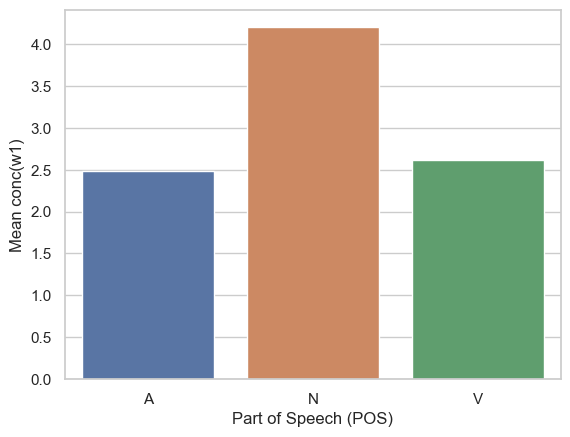

POS
A    2.49
N    4.20
V    2.62
Name: conc(w1), dtype: float64


In [76]:
# Plot the mean concreteness w1 aggregated by POS
plot_feature_by_pos(eng_simlex, 'conc(w1)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'conc(w1)')

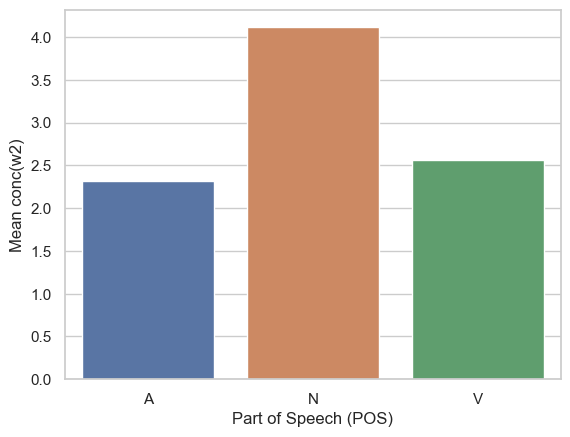

POS
A    2.31
N    4.11
V    2.56
Name: conc(w2), dtype: float64


In [77]:
# Plot the mean concreteness w2 aggregated by POS
plot_feature_by_pos(eng_simlex, 'conc(w2)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'conc(w2)')

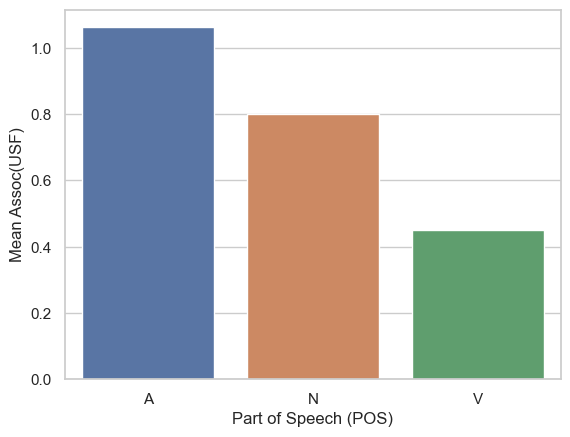

POS
A    1.06
N    0.80
V    0.45
Name: Assoc(USF), dtype: float64


In [78]:
# Plot the mean association scores aggregated by POS
plot_feature_by_pos(eng_simlex, 'Assoc(USF)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'Assoc(USF)')

#### **3.7. Correlations**

##### **3.7.1. Dutch SimLex-999**

##### **3.7.1.1 Overview**

In [131]:
# Select subset of dataset
subset_nl_simlex = nl_simlex[['SimLex999', 'SD(SimLex)']]

In [133]:
# Calculating correlation
correlation_matrix_nl_simlex = subset_nl_simlex.corr(method='pearson')

# Show results
correlation_matrix_nl_simlex

,SimLex999,SD(SimLex)
SimLex999,1.000000,0.243008
SD(SimLex),0.243008,1.000000


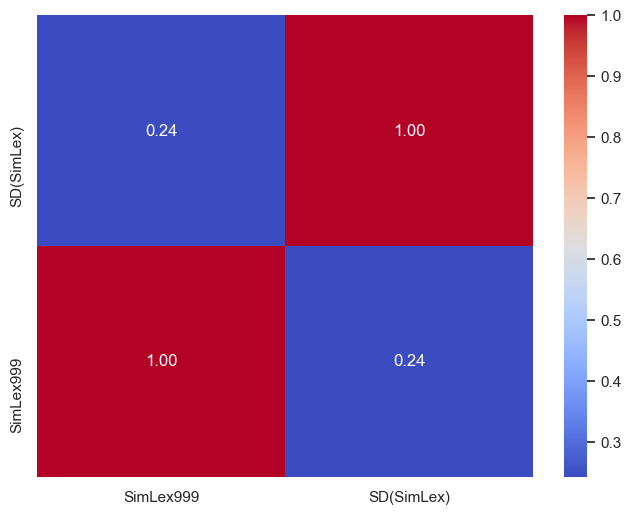

In [134]:
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_nl_simlex, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix of SimLex (ENG)")
plt.gca().invert_yaxis() # Reverse the y-axis
plt.show()

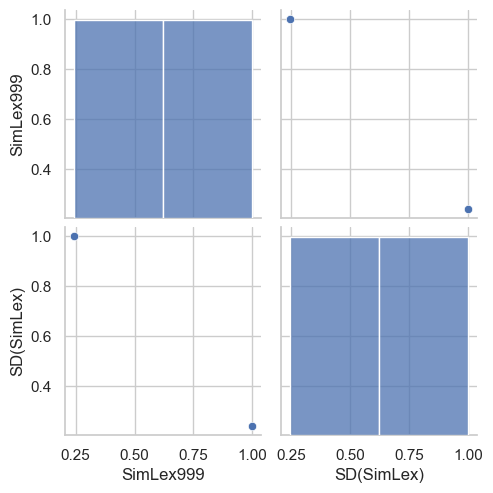

In [135]:
# Pairplot to plot the overview of scatterplots
sns.pairplot(correlation_matrix_nl_simlex)
plt.show()

##### **3.7.1.2 Individual**

##### **Similarity vs Standard Deviation**

In [130]:
# Correlation between SimLex-999 similarity score and standard deviation
print_correlation_and_pvalue(nl_simlex, 'SimLex999', 'SD(SimLex)')

Correlation between SimLex999 and SD(SimLex): 0.24301
P-value: 6.799148080785488e-15
The correlation is statistically significant.



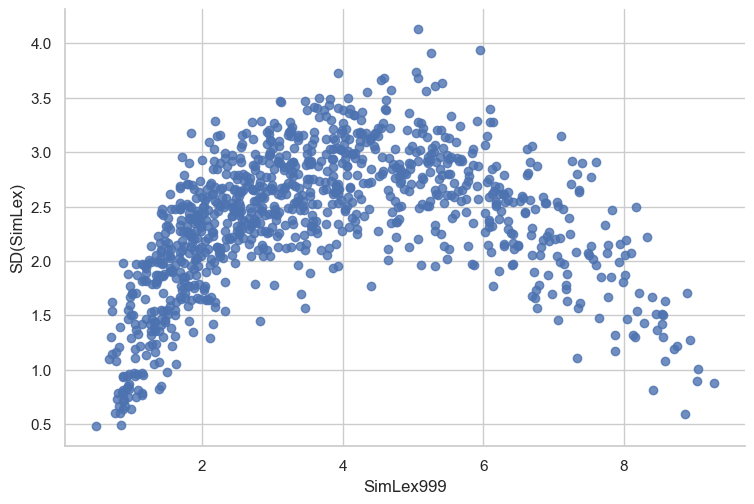

In [126]:
# Plot correlation between SimLex-999 similarity score and standard deviation
plot_correlation(nl_simlex, 'SimLex999', 'SD(SimLex)')

##### **3.7.2. English SimLex-999**

##### **3.7.2.1 Overview**

In [86]:
# Select subset of dataset
subset_eng_simlex = eng_simlex[['SimLex999', 'conc(w1)', 'conc(w2)', 'Assoc(USF)', 'SD(SimLex)']]

In [128]:
# Calculating correlation
correlation_matrix_eng_simlex = subset_eng_simlex..corr(method='pearson')

# Show results
correlation_matrix_eng_simlex

,SimLex999,conc(w1),conc(w2),Assoc(USF),SD(SimLex)
SimLex999,1.000000,-0.129236,-0.119966,0.188751,-0.054132
conc(w1),-0.129236,1.000000,0.805133,0.118817,0.028121
conc(w2),-0.119966,0.805133,1.000000,0.106083,0.005011
Assoc(USF),0.188751,0.118817,0.106083,1.000000,-0.132269
SD(SimLex),-0.054132,0.028121,0.005011,-0.132269,1.000000


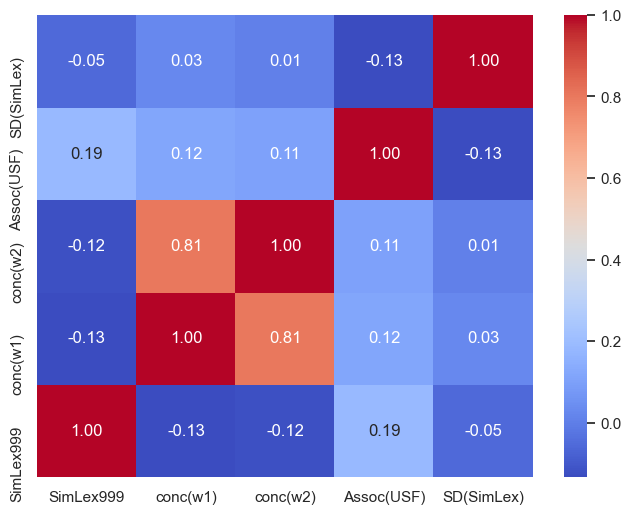

In [129]:
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_eng_simlex, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix of SimLex (ENG)")
plt.gca().invert_yaxis() # Reverse the y-axis
plt.show()

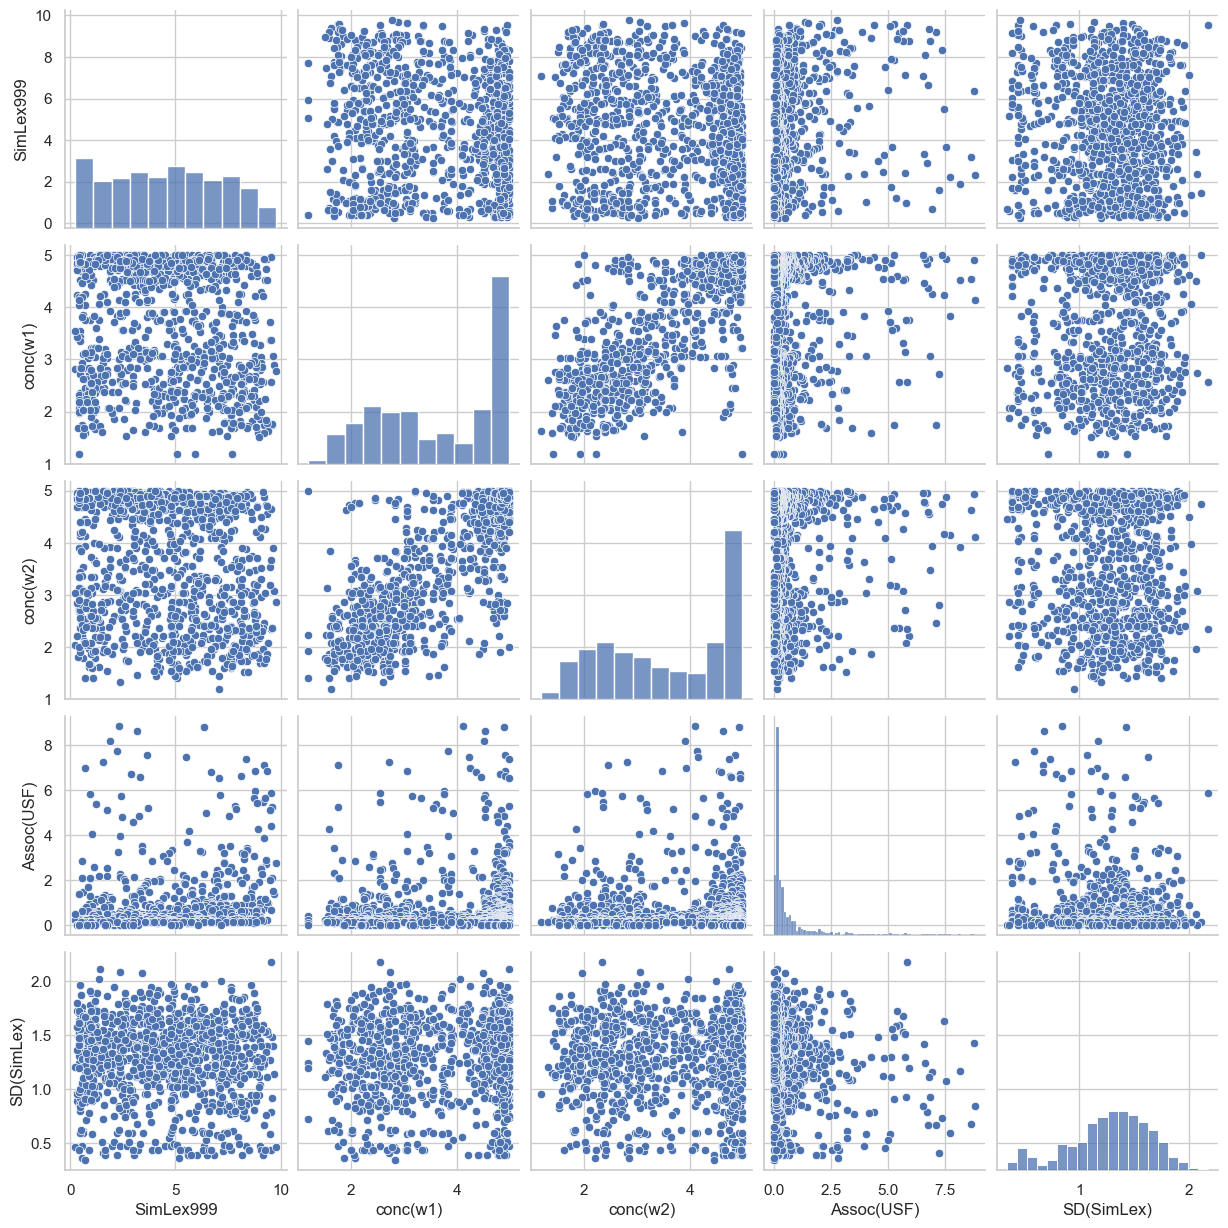

In [89]:
# Pairplot to plot the overview of scatterplots
sns.pairplot(subset_eng_simlex)
plt.show()

##### **3.7.2.2 Individual**

##### **Similarity vs Association**

In [90]:
# Correlation between SimLex-999 similarity score and Assoc(USF) association scores
print_correlation_and_pvalue(eng_simlex, 'SimLex999', 'Assoc(USF)')

Correlation between SimLex999 and Assoc(USF): 0.18875
P-value: 1.8268817773562045e-09
The correlation is statistically significant.



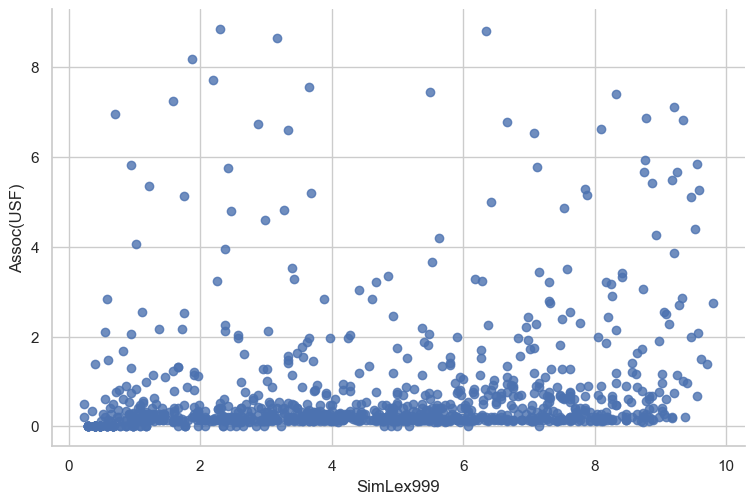

In [91]:
# Plot correlation between SimLex-999 similarity score and Assoc(USF)
plot_correlation(eng_simlex, 'SimLex999', 'Assoc(USF)')

##### **Similarity vs Concreteness**

This correlation shows if concrete words have higher/lower similarity scores compared to abstract words. If the concreteness of the first/second word in a pair increases, does the semantic similarity between the words increase as well?

In [92]:
# Correlation between SimLex-999 similarity score and concreteness w1
print_correlation_and_pvalue(eng_simlex, 'SimLex999','conc(w1)')

# Correlation between SimLex-999 similarity score and concreteness w2
print_correlation_and_pvalue(eng_simlex, 'SimLex999', 'conc(w2)')

Correlation between SimLex999 and conc(w1): -0.12924
P-value: 4.188159650015106e-05
The correlation is statistically significant.

Correlation between SimLex999 and conc(w2): -0.11997
P-value: 0.00014426924175285242
The correlation is statistically significant.



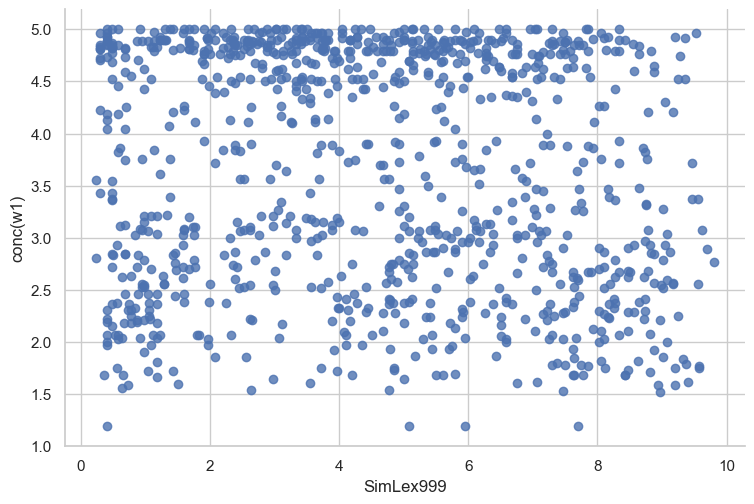

In [93]:
# Plot correlation between SimLex-999 similarity score and concreteness w1
plot_correlation(eng_simlex, 'SimLex999', 'conc(w1)')

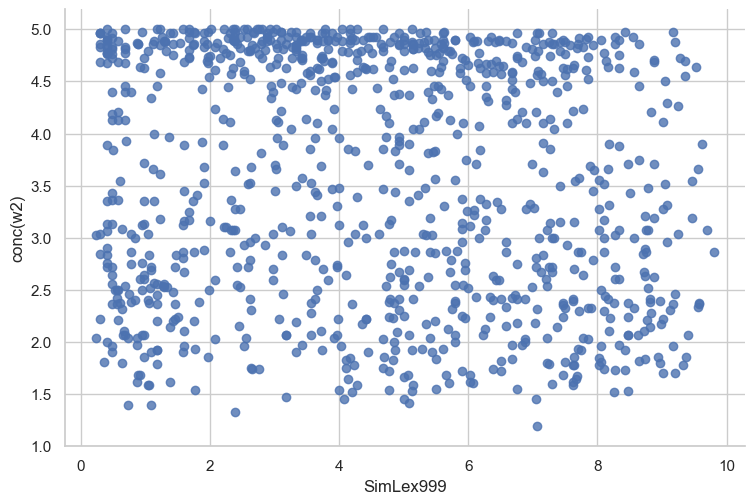

In [94]:
# Plot correlation between similarity score and concreteness w2
plot_correlation(eng_simlex, 'SimLex999', 'conc(w2)')

##### **Similarity vs Standard Deviation**

This correlation indicates whether word pairs with high variability in semantic similarity have higher/lower average similarity scores.

In [95]:
# Correlation between SimLex-999 and standard deviation
print_correlation_and_pvalue(eng_simlex, 'SimLex999', 'SD(SimLex)')

Correlation between SimLex999 and SD(SimLex): -0.05413
P-value: 0.08725330779410836
The correlation is not statistically significant.



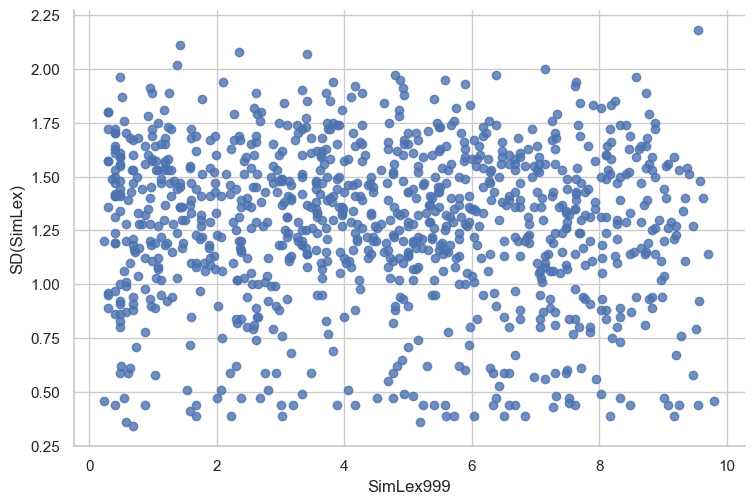

In [96]:

# Plot correlation between similarity score and standard deviation
plot_correlation(eng_simlex, 'SimLex999', 'SD(SimLex)')

##### **Concreteness vs Association**

In [97]:
# Correlation between concreteness w1 and association
print_correlation_and_pvalue(eng_simlex, 'conc(w1)', 'Assoc(USF)')

Correlation between conc(w1) and Assoc(USF): 0.11882
P-value: 0.00016715993622586566
The correlation is statistically significant.



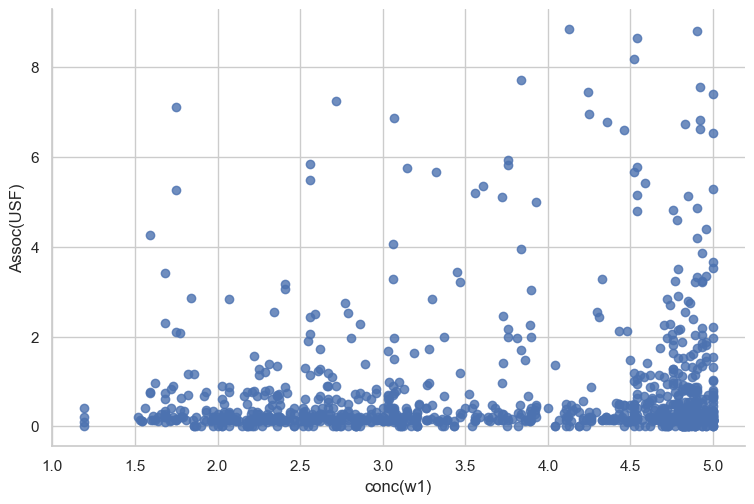

In [98]:

# Plot correlation between concreteness w2 and association
plot_correlation(eng_simlex, 'conc(w1)', 'Assoc(USF)')

In [99]:
# Correlation between concreteness and association
print_correlation_and_pvalue(eng_simlex, 'conc(w2)', 'Assoc(USF)')

Correlation between conc(w2) and Assoc(USF): 0.10608
P-value: 0.0007844280290287479
The correlation is statistically significant.



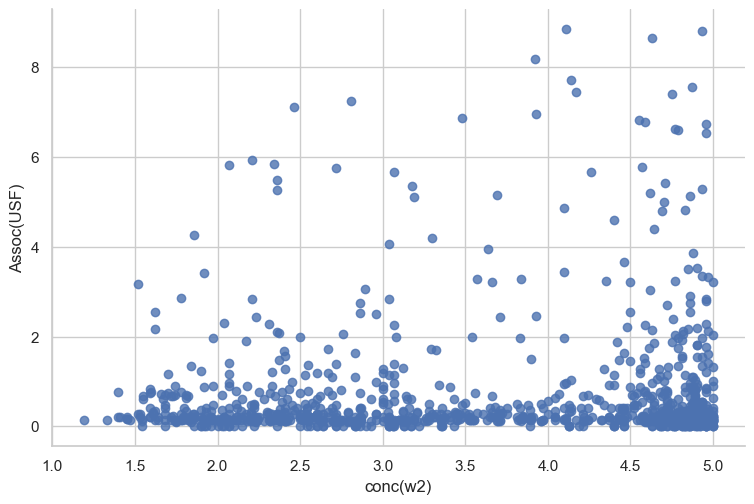

In [100]:

# Plot correlation between concreteness and association
plot_correlation(eng_simlex, 'conc(w2)', 'Assoc(USF)')

##### **Concreteness vs Standard Deviation**

In [101]:
# Correlation between concreteness and standard deviation
print_correlation_and_pvalue(eng_simlex, 'conc(w1)', 'SD(SimLex)')

Correlation between conc(w1) and SD(SimLex): 0.02812
P-value: 0.3746043812080904
The correlation is not statistically significant.



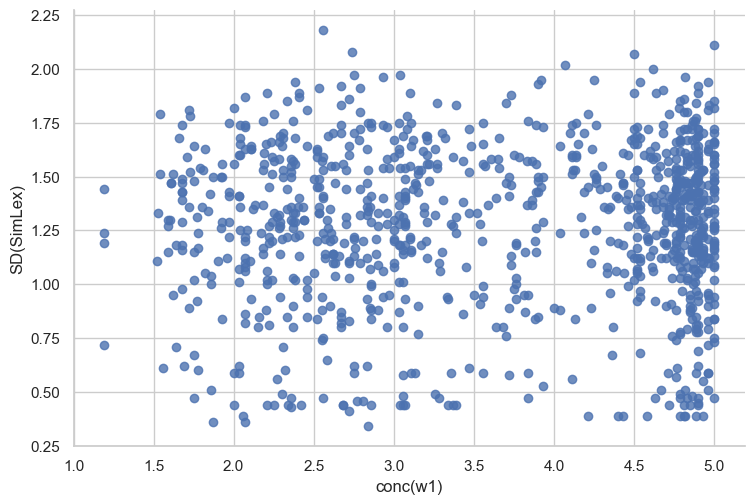

In [102]:

# Plot correlation between concreteness and standard deviation
plot_correlation(eng_simlex, 'conc(w1)', 'SD(SimLex)')

In [103]:
# Correlation between concreteness and standard deviation
print_correlation_and_pvalue(eng_simlex, 'conc(w2)', 'SD(SimLex)')

Correlation between conc(w2) and SD(SimLex): 0.00501
P-value: 0.8743208935326142
The correlation is not statistically significant.



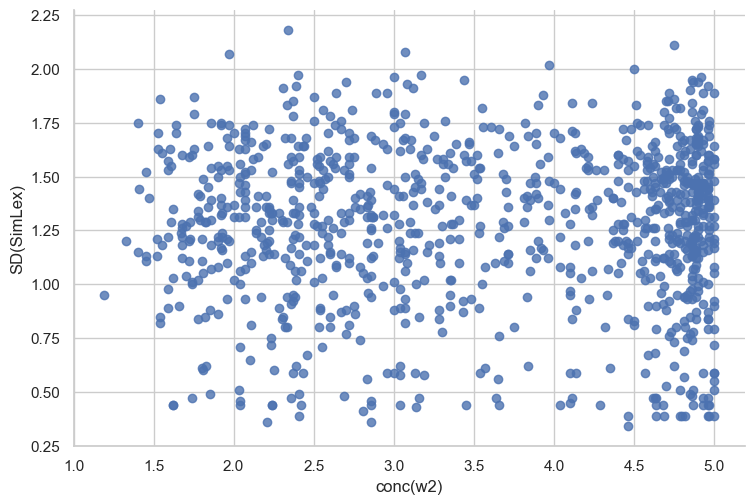

In [104]:

# Plot correlation between concreteness and standard deviation
plot_correlation(eng_simlex, 'conc(w2)', 'SD(SimLex)')

##### **Association vs Standard Deviation**

In [105]:
# Correlation between association and standard deviation
print_correlation_and_pvalue(eng_simlex, 'Assoc(USF)', 'SD(SimLex)')

Correlation between Assoc(USF) and SD(SimLex): -0.13227
P-value: 2.7430181587107337e-05
The correlation is statistically significant.



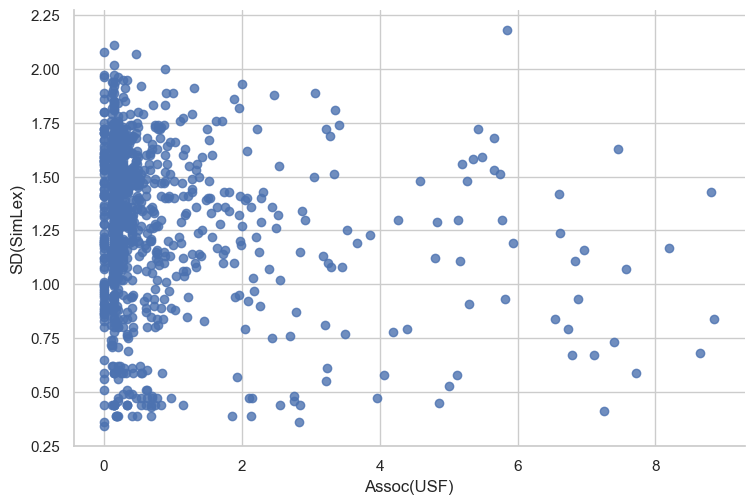

In [106]:

# Correlation between association and standard deviation
plot_correlation(eng_simlex, 'Assoc(USF)', 'SD(SimLex)')